In [4]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 


In [6]:
data=pd.read_csv("C:/Users/smrc/Desktop/10Academy/week1/raw_analyst_ratings.csv")

In [7]:
data.shape

(1407328, 6)

In [8]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


## Descriptive analysis

In [11]:
data['headline_length'] = data['headline'].apply(len)
"""Use the .apply() function 
with len() to calculate 
the length of each headline.
"""

print(data['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [12]:
article_counts = data['publisher'].value_counts()
"""
groups the data by publisher 
and counts the number of the articles
"""
print(article_counts)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [23]:

data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['date'] = data['date'].dt.tz_localize(None)  


publication_trends = data.groupby(data['date'].dt.to_period('D')).size()
print(publication_trends)

"""
line-1 converts publication dates to a Pandas datetime object.
line-2 Removes timezone information if present
Use df['date'].value_counts() or groupby to analyze trends.
"""


date
2020-05-22    26
2020-05-26    28
2020-06-03    56
2020-06-05    62
Freq: D, dtype: int64


"\nline-1 converts publication dates to a Pandas datetime object.\nline-2 Removes timezone information if present\nUse df['date'].value_counts() or groupby to analyze trends.\n"

## 2 Text Analysis

In [25]:
from textblob import TextBlob

data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment_label'] = data['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)
sentiment_counts = data['sentiment_label'].value_counts()
print(sentiment_counts)


sentiment_label
Neutral     934928
Positive    341161
Negative    131239
Name: count, dtype: int64


In [27]:
total=sentiment_counts.sum()
print(total)

1407328


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['headline'])
print(vectorizer.get_feature_names_out()[:10])  # View top keywords


['00' '000' '0000' '00000001' '00001' '0000gmt' '0001' '0002' '0003'
 '0004']


## 3 Time Series Analysis

<Axes: xlabel='date'>

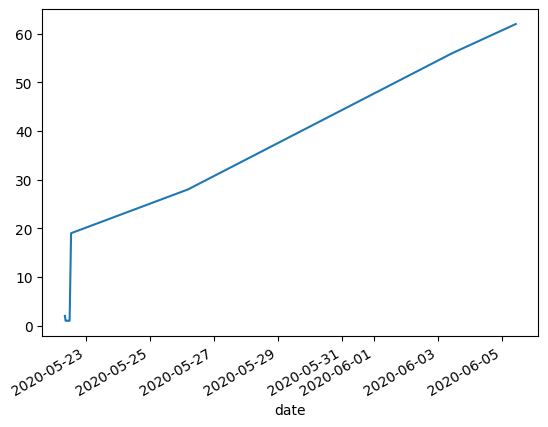

In [34]:
publication_freq = data.groupby('date').size()
publication_freq.plot(kind='line')


'\nExtracts hour of publication from the timestamp.\n'

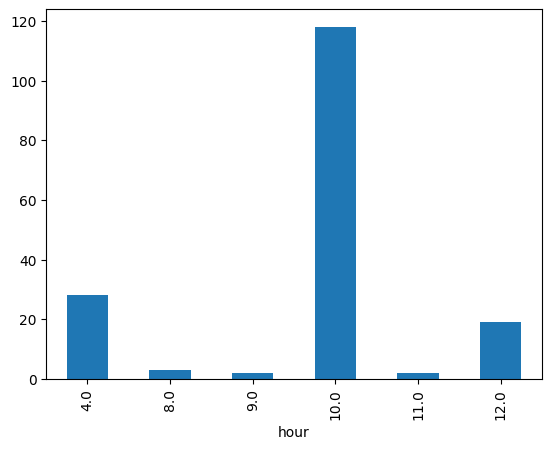

In [36]:
data['hour'] = data['date'].dt.hour
hourly_publication = data.groupby('hour').size()
hourly_publication.plot(kind='bar')
"""
Extracts hour of publication from the timestamp.
"""

## 4 Publisher Analysis

In [37]:
top_publishers = data['publisher'].value_counts()
print(top_publishers)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [38]:
publisher_trends = data[data['publisher'] == 'Publisher A']
print(publisher_trends['headline'].head())


Series([], Name: headline, dtype: object)


In [ ]:
data['domain'] = data['publisher'].str.split('@').str[-1]
domain_counts = data['domain'].value_counts()
print(domain_counts)


domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Mark Davis                1
janaviktoria              1
Kiana Danial              1
giovannimola              1
Jeremie Capron            1
Name: count, Length: 1024, dtype: int64
